In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
# define functions
def LinearFunc(t, a, b):
    return a * t + b

def ChiSqrd(Data, Fit, Error):
    return sum( ((Data - Fit) / Error)**2 )

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( ((Data - Fit) / Error)**2 ) / (np.size(Data) - NumPrams - 2)

def GuessFunc(x, a, b, A, h):
    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

def GuessFunc2(x, A, c, b, h):
    return A*np.tanh((x-b)/c) + h

def WeightedAverageError(Err):
    return np.sqrt( 1/( sum( 1/(Err)**2 ) ) )

def WeightedAverage(Val, Err):
    return ( sum( Val/(Err)**2 ) )/( sum( 1/(Err)**2 ) )

## BaTiO3
### Importing Data and Error Determination


Rising Error
7.339920241349011e-13

Falling Error
4.172552124906551e-13


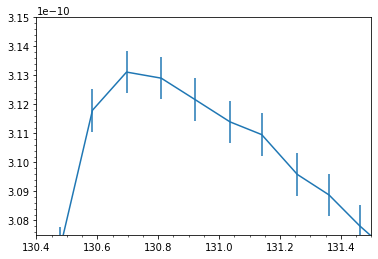

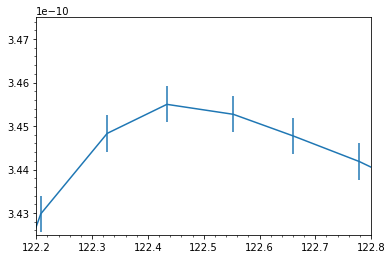


Rising Temp TC = 130.75300000000004 +/- 0.3380000000000223
C[TC] = 3.129028e-10 +/- 7.339920241349011e-13
Falling Temp TC = 122.49349999999998 +/- 0.33299999999997
C[TC] = 3.4527080000000004e-10 +/- 4.172552124906551e-13


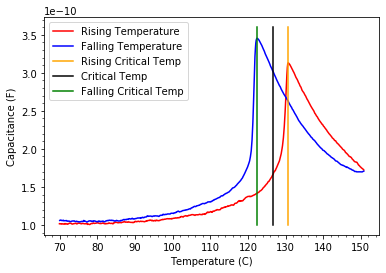

In [13]:
FACTOR = 1
#FACTOR = 25/100
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/BaTiO3_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col4'])

#Formatting Data
x = np.resize(x,(1544,1)) + 273
y = np.resize(y,(1544,1))

TStartIndex = 74
TCutIndex = 766
TEndIndex = 1424

#print(np.where(x < 70))
#print(np.where(x == max(x)))

#Resizing and cutting
y = -(y/(25000*1000)) #internal resistnace from manual is 1kOhm frequency is 25kHz

y = y *FACTOR

xF = x[0:1512,0]
yF = y[0:1512,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = y[(TCutIndex+1):TEndIndex,0]

#print(np.where(y1 == max(y1)))
#print(np.where(y2 == max(y2)))

#plt.plot(xF-273, yF)
#plt.minorticks_on()
#plt.show()



#Rising Error
print("")
print("Rising Error")
Ex = x1[400:460]
Ey = y1[400:460]

Guess = [0.0001, 0]
Param, Param_cov = curve_fit(LinearFunc, Ex, Ey, Guess, maxfev=150000)

error = np.sqrt( sum( (Ey - LinearFunc(Ex, *Param))**2 ) / (np.size(Ex) - 2) )
ErrorArray1 = error * np.ones(np.size(x1))

print(error)
CError1 = error

#plt.plot(Ex-273, Ey)
#plt.plot(Ex-273, LinearFunc(Ex, *Param))
#plt.show()

#Falling Error
print("")
print("Falling Error")
Ex = x2[300:360]
Ey = y2[300:360]

Guess = [0.0001, 0]
Param, Param_cov = curve_fit(LinearFunc, Ex, Ey, Guess, maxfev=150000)

error = np.sqrt( sum( (Ey - LinearFunc(Ex, *Param))**2 ) / (np.size(Ex) - 2) )
ErrorArray2 = error * np.ones(np.size(x2))

print(error)
CError2 = error

#plt.plot(Ex-273, Ey)
#plt.plot(Ex-273, LinearFunc(Ex, *Param))
#plt.show()



#Error on Tc

plt.errorbar(x1-273, y1, yerr = ErrorArray1)
plt.ylim([3.075*10**(-10)*FACTOR,3.15*10**(-10)*FACTOR])
plt.xlim([130.4,131.5])
plt.minorticks_on()
plt.show()

plt.errorbar(x2-273, y2, yerr = ErrorArray2)
plt.ylim([3.425*10**(-10)*FACTOR,3.475*10**(-10)*FACTOR])
plt.xlim([122.2,122.8])
plt.minorticks_on()
plt.show()



TC1index = 528
TC2index = 211
TC1 = (1/2) * (x1[TC1index+2] + x1[TC1index-1])
TC2 = (1/2) * (x2[TC2index-2] + x2[TC2index+1])
TC1Error = x1[TC1index+2] - x1[TC1index-1]
TC2Error = x2[TC2index-2] - x2[TC2index+1]

print("")
print("Rising Temp TC = " + str(TC1-273) + " +/- " + str(TC1Error))
print("C[TC] = " + str(y1[TC1index+1]) + " +/- " + str(CError1))
print("Falling Temp TC = " + str(TC2-273) + " +/- " + str(TC2Error))
print("C[TC] = " + str(y2[TC2index-1]) + " +/- " + str(CError2))

fig = plt.figure()
fig1 = fig.add_subplot(1,1,1)
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Capacitance (F)")
fig1.plot(x1-273, y1, color='red', label='Rising Temperature')
fig1.plot(x2-273, y2, color='blue', label='Falling Temperature')
fig1.plot([TC1-273, TC1-273],[10**(-10)*FACTOR,3.6*10**(-10)*FACTOR],color='orange',label='Rising Critical Temp')
fig1.plot([(TC1/2 + TC2/2)-273, (TC1/2 + TC2/2)-273],[10**(-10)*FACTOR,3.6*10**(-10)*FACTOR],color='black',label='Critical Temp')
fig1.plot([TC2-273, TC2-273],[10**(-10)*FACTOR,3.6*10**(-10)*FACTOR],color='green',label='Falling Critical Temp')
fig1.minorticks_on()
fig1.legend();

fig.savefig('BaTiO3Full.jpg', bbox_inches='tight', dpi=150)

plt.show()


### Rising Temp

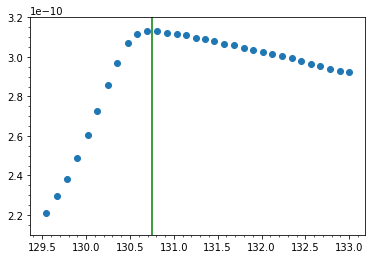

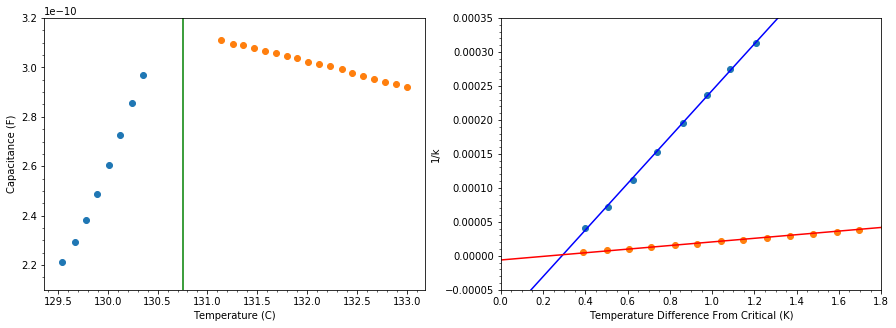

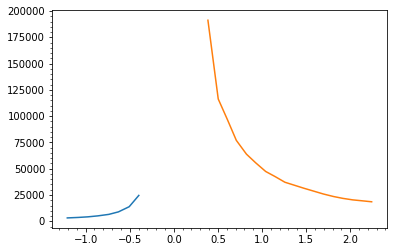


CWLow [K] = 2920.331376083027 +/- 35.99623576507507
CWHigh [K] = 37596.738681684 +/- 520.3951863226537
Ratio(L/H) = 0.07767512498379878 +/- 0.0014396520165488294


In [4]:
Floor = 2.2*10**(-10)*FACTOR
MaxT = 133+273
TC = TC1
TCError = TC1Error
yAtTC = y1[TC1index]
#######
#CNot = 10**(7)
#CNotError = 100
length = 0.01
width = 0.008
dist = 0.003
mesError = 0.001
#######
eNot = 8.85*10**(-12)
offset = 0.3
CError = CError1

#Say error in TC is the same as error in T everywhere so error in the difference (T-TC) is
TTCError = np.sqrt(2) * TCError

CNot = eNot * length * width / dist
CNotError = eNot * mesError * np.sqrt( (width / dist)**2 + (length / dist)**2 + (length * width / dist**2)**2 )

x = x1
y = y1

x = x[(np.where(y > Floor )[0])]
y = y[(np.where(y > Floor )[0])]

x = x[(np.where(x < MaxT )[0])]
y = y[(np.where(x < MaxT )[0])]

#print(np.where(y == max(y))[0])
#TCindex = (np.where(y == max(y))[0])

xLow = x[(np.where(x < TC - offset )[0])]
yLow = y[(np.where(x < TC - offset)[0])]
xHigh = x[(np.where(x > TC + offset)[0])]
yHigh = y[(np.where(x > TC + offset)[0])]

TTCErrorArrayLow = TTCError * np.ones(np.size(xLow))
TTCErrorArrayHigh = TTCError * np.ones(np.size(xHigh))

kInvLow = (CNot * (yAtTC - yLow))/(yLow * yAtTC)      #1/k
kInvHigh = (CNot * (yAtTC - yHigh))/(yHigh * yAtTC)

kLowInvVarArray = ( (yAtTC - yLow)/(yLow * yAtTC) )**2 * CNotError**2 + ( ( CNot/(yAtTC)**2 )**2 + ( CNot/(yLow)**2 )**2 ) * CError*2
kHighInvVarArray = ( (yAtTC - yHigh)/(yHigh * yAtTC) )**2 * CNotError**2 + ( ( CNot/(yAtTC)**2 )**2 + ( CNot/(yHigh)**2 )**2 ) * CError*2

Guess = [120000, 0]
LowParam, LowParam_cov = curve_fit(LinearFunc, (TC-xLow), kInvLow, Guess, maxfev=150000, sigma=np.sqrt(kLowInvVarArray))
Guess = [10000, 0]
HighParam, HighParam_cov = curve_fit(LinearFunc, (xHigh-TC), kInvHigh, Guess, maxfev=150000, sigma=np.sqrt(TTCErrorArrayHigh))

LowPltx = np.linspace(0, 1.6*10**(5), 20)
HighPltx = np.linspace(0, 0.5*10**(5), 20)


plt.scatter(x-273, y)
plt.plot([TC-273, TC-273],[(Floor-10**(-11)),3.2*10**(-10)],color='g')
plt.minorticks_on()
plt.ylim([(Floor-10**(-11)),3.2*10**(-10)])
plt.show()


fig = plt.figure(figsize=(15,5))
fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Capacitance (F)")
fig1.scatter(xLow-273, yLow)
fig1.scatter(xHigh-273, yHigh)
fig1.plot([TC-273, TC-273],[(Floor-10**(-11)),3.2*10**(-10)],color='g')
fig1.minorticks_on()
fig1.set_ylim([(Floor-10**(-11)),3.2*10**(-10)])


fig2.scatter(TC-xLow, kInvLow)
fig2.scatter(xHigh-TC, kInvHigh)
fig2.plot(LowPltx, LinearFunc(LowPltx, *LowParam), color='b') 
fig2.plot(HighPltx, LinearFunc(HighPltx, *HighParam), color='r') 
fig2.set_ylim([-0.00005,.00035])
fig2.set_xlim([0,1.8])
fig2.set_xlabel("Temperature Difference From Critical (K)")
fig2.set_ylabel("1/k")
fig2.minorticks_on()

fig.savefig('BaTiO3Curie.jpg', bbox_inches='tight', dpi=150)
plt.show()

plt.plot(xLow-TC, 1/kInvLow)
plt.plot(xHigh-TC, 1/kInvHigh)
plt.minorticks_on()
plt.show()
#put offset to 0




CWLow = 1/LowParam[0]
CWHigh = 1/HighParam[0]

CWLowError = (np.sqrt(LowParam_cov[0,0]))/(LowParam[0])**2
CWHighError = (np.sqrt(HighParam_cov[0,0]))/(HighParam[0])**2

Ratio = HighParam[0]/LowParam[0]
RatioError = np.sqrt( (HighParam_cov[0,0]/LowParam[0]**2) + (HighParam[0]/LowParam[0]**2)**2 *LowParam_cov[0,0] )

#print(LowParam[0])
#print(HighParam[0])
#print(HighParam[0]/LowParam[0])
print("")
print("CWLow [K] = " + str(CWLow) + " +/- " + str(CWLowError))
print("CWHigh [K] = " + str(CWHigh) + " +/- " + str(CWHighError))

print("Ratio(L/H) = " + str(Ratio) + " +/- " + str(RatioError))

CWLow1 = CWLow
CWLow1Error = CWLowError
CWHigh1 = CWHigh
CWHigh1Error = CWHighError
Raito1 = Ratio
Raito1Error = RatioError

### Microscopic Dipole Moment and Effective Atomic Displacement

In [5]:
eNot = 8.85*10**(-12)  #F/m
kb = 1.38*10**(-23)    #J/K
aaa = 6.5723*10**(-29) #m^3
elec = 1.6*10**(-19)   #C

DipMomLow = np.sqrt( eNot * kb * aaa * CWLow )
DipMomHigh = np.sqrt( eNot * kb * aaa * CWHigh )

DipMomLowError = CWLowError * (1/2) * np.sqrt(eNot * kb * aaa / CWLow)
DipMomHighError = CWHighError * (1/2) * np.sqrt(eNot * kb * aaa / CWHigh)

AtomDispLow = DipMomLow / (6*elec)
AtomDispHigh = DipMomHigh / (6*elec)

AtomDispLowError = DipMomLowError / (6*elec)
AtomDispHighError = DipMomHighError / (6*elec)

print("Dipole moment T>Tc [Cm] = " + str(DipMomHigh) + " +/- " + str(DipMomHighError))
print("Eff Atomic Displacement T>Tc [Angstrom] = " + str(AtomDispHigh*10**(10)) + " +/- " + str(AtomDispHighError*10**(10)))
print("")
print("Dipole moment T<Tc [Cm] = " + str(DipMomLow) + " +/- " + str(DipMomLowError))
print("Eff Atomic Displacement T<Tc [Angstrom] = " + str(AtomDispLow*10**(10)) + " +/- " + str(AtomDispLowError*10**(10)))

DipMomLow1 = DipMomLow
DipMomHigh1 = DipMomHigh
DipMomLow1Error = DipMomLowError
DipMomHigh1Error = DipMomHighError

AtomDispLow1 = AtomDispLow
AtomDispHigh1 = AtomDispHigh
AtomDispLow1Error = AtomDispLowError
AtomDispHigh1Error = AtomDispHighError

Dipole moment T>Tc [Cm] = 1.737180537069304e-29 +/- 1.202259053528863e-31
Eff Atomic Displacement T>Tc [Angstrom] = 0.18095630594471915 +/- 0.0012523531807592323

Dipole moment T<Tc [Cm] = 4.841566878993939e-30 +/- 2.9838768345940216e-32
Eff Atomic Displacement T<Tc [Angstrom] = 0.05043298832285353 +/- 0.0003108205036035439


### Falling Temp

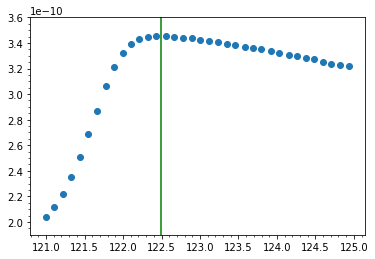

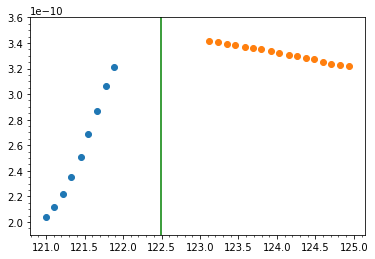

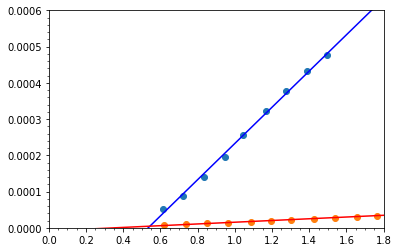

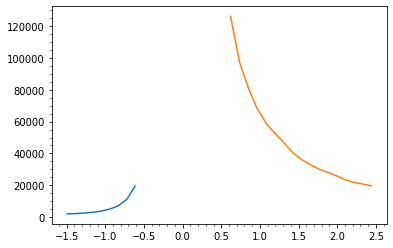


CWLow [K] = 2000.8260286692264 +/- 44.51465266160365
CWHigh [K] = 41850.636639212564 +/- 742.0197358496627
Ratio(L/H) = 0.0478087357647153 +/- 0.0013601053941760003


In [6]:
Floor = 2.0*10**(-10)*FACTOR
MaxT = 125+273
TC = TC2
TCError = TC2Error
yAtTC = y2[TC2index]
#######
#CNot = 10**(7)
#CNotError = 100
length = 0.01
width = 0.008
dist = 0.003
mesError = 0.001
#######
eNot = 8.85*10**(-12)
offset = 0.6
CError = CError2

#Say error in TC is the same as error in T everywhere so error in the difference (T-TC) is
TTCError = np.sqrt(2) * TCError

CNot = eNot * length * width / dist
CNotError = eNot * mesError * np.sqrt( (width / dist)**2 + (length / dist)**2 + (length * width / dist**2)**2 )

x = np.flip(x2)
y = np.flip(y2)

x = x[(np.where(y > Floor )[0])]
y = y[(np.where(y > Floor )[0])]

x = x[(np.where(x < MaxT )[0])]
y = y[(np.where(x < MaxT )[0])]

#print(np.where(y == max(y))[0])
#TCindex = (np.where(y == max(y))[0])

xLow = x[(np.where(x < TC - offset )[0])]
yLow = y[(np.where(x < TC - offset)[0])]
xHigh = x[(np.where(x > TC + offset)[0])]
yHigh = y[(np.where(x > TC + offset)[0])]

TTCErrorArrayLow = TTCError * np.ones(np.size(xLow))
TTCErrorArrayHigh = TTCError * np.ones(np.size(xHigh))

kInvLow = (CNot * (yAtTC - yLow))/(yLow * yAtTC)      #1/k
kInvHigh = (CNot * (yAtTC - yHigh))/(yHigh * yAtTC)

kLowInvVarArray = ( (yAtTC - yLow)/(yLow * yAtTC) )**2 * CNotError**2 + ( ( CNot/(yAtTC)**2 )**2 + ( CNot/(yLow)**2 )**2 ) * CError*2
kHighInvVarArray = ( (yAtTC - yHigh)/(yHigh * yAtTC) )**2 * CNotError**2 + ( ( CNot/(yAtTC)**2 )**2 + ( CNot/(yHigh)**2 )**2 ) * CError*2

Guess = [120000, 0]
LowParam, LowParam_cov = curve_fit(LinearFunc, (TC-xLow), kInvLow, Guess, maxfev=150000, sigma=np.sqrt(kLowInvVarArray))
Guess = [10000, 0]
HighParam, HighParam_cov = curve_fit(LinearFunc, (xHigh-TC), kInvHigh, Guess, maxfev=150000, sigma=np.sqrt(TTCErrorArrayHigh))

LowPltx = np.linspace(0, 1.6*10**(5), 20)
HighPltx = np.linspace(0, 0.5*10**(5), 20)

plt.scatter(x-273, y)
plt.plot([TC-273, TC-273],[(Floor-10**(-11)),3.6*10**(-10)],color='g')
plt.minorticks_on()
plt.ylim([(Floor-10**(-11)),3.6*10**(-10)])
plt.show()

plt.scatter(xLow-273, yLow)
plt.scatter(xHigh-273, yHigh)
plt.plot([TC-273, TC-273],[(Floor-10**(-11)),3.6*10**(-10)],color='g')
plt.minorticks_on()
plt.ylim([(Floor-10**(-11)),3.6*10**(-10)])
plt.show()

plt.scatter(TC-xLow, kInvLow)
plt.scatter(xHigh-TC, kInvHigh)
#plt.errorbar(1/kLow, TC-xLow, yerr=yLowErrorUpdated)
#plt.errorbar(1/kHigh, xHigh-TC, yerr=yHighErrorUpdated)
plt.plot(LowPltx, LinearFunc(LowPltx, *LowParam), color='b') 
plt.plot(HighPltx, LinearFunc(HighPltx, *HighParam), color='r') 
plt.ylim([0,.0006])
plt.xlim([0,1.8])
plt.minorticks_on()
plt.show()

plt.plot(xLow-TC, 1/kInvLow)
plt.plot(xHigh-TC, 1/kInvHigh)
plt.minorticks_on()
plt.show()
#put offset to 0




CWLow = 1/LowParam[0]
CWHigh = 1/HighParam[0]

CWLowError = (np.sqrt(LowParam_cov[0,0]))/(LowParam[0])**2
CWHighError = np.sqrt( ((np.sqrt(HighParam_cov[0,0]))/(HighParam[0])**2)**2 + 0)

Ratio = HighParam[0]/LowParam[0]
RatioError = np.sqrt( (HighParam_cov[0,0]/LowParam[0]**2) + (HighParam[0]/LowParam[0]**2)**2 *LowParam_cov[0,0] )

#print(LowParam[0])
#print(HighParam[0])
#print(HighParam[0]/LowParam[0])
print("")
print("CWLow [K] = " + str(CWLow) + " +/- " + str(CWLowError))
print("CWHigh [K] = " + str(CWHigh) + " +/- " + str(CWHighError))

print("Ratio(L/H) = " + str(Ratio) + " +/- " + str(RatioError))

CWLow2 = CWLow
CWLow2Error = CWLowError
CWHigh2 = CWHigh
CWHigh2Error = CWHighError
Raito2 = Ratio
Raito2Error = RatioError

### Microscopic Dipole Moment and Effective Atomic Displacement

In [7]:
eNot = 8.85*10**(-12)  #F/m
kb = 1.38*10**(-23)    #J/K
aaa = 6.5723*10**(-29) #m^3
elec = 1.6*10**(-19)   #C

DipMomLow = np.sqrt( eNot * kb * aaa * CWLow )
DipMomHigh = np.sqrt( eNot * kb * aaa * CWHigh )

DipMomLowError = CWLowError * (1/2) * np.sqrt(eNot * kb * aaa / CWLow)
DipMomHighError = CWHighError * (1/2) * np.sqrt(eNot * kb * aaa / CWHigh)

AtomDispLow = DipMomLow / (6*elec)
AtomDispHigh = DipMomHigh / (6*elec)

AtomDispLowError = DipMomLowError / (6*elec)
AtomDispHighError = DipMomHighError / (6*elec)

print("Dipole moment T>Tc [Cm] = " + str(DipMomHigh) + " +/- " + str(DipMomHighError))
print("Eff Atomic Displacement T>Tc [Angstrom] = " + str(AtomDispHigh*10**(10)) + " +/- " + str(AtomDispHighError*10**(10)))
print("")
print("Dipole moment T<Tc [Cm] = " + str(DipMomLow) + " +/- " + str(DipMomLowError))
print("Eff Atomic Displacement T<Tc [Angstrom] = " + str(AtomDispLow*10**(10)) + " +/- " + str(AtomDispLowError*10**(10)))

DipMomLow2 = DipMomLow
DipMomHigh2 = DipMomHigh
DipMomLow2Error = DipMomLowError
DipMomHigh2Error = DipMomHighError

AtomDispLow2 = AtomDispLow
AtomDispHigh2 = AtomDispHigh
AtomDispLow2Error = AtomDispLowError
AtomDispHigh2Error = AtomDispHighError



Dipole moment T>Tc [Cm] = 1.8328245885116584e-29 +/- 1.624816402137982e-31
Eff Atomic Displacement T>Tc [Angstrom] = 0.1909192279699644 +/- 0.0016925170855603977

Dipole moment T<Tc [Cm] = 4.0075092396166035e-30 +/- 4.457980836003811e-32
Eff Atomic Displacement T<Tc [Angstrom] = 0.04174488791267295 +/- 0.00046437300375039693


In [8]:
#def WeightedAverageError(Err):
#    return np.sqrt( 1/( sum( 1/(Err)**2 ) ) )
#
#def WeightedAverage(Val, Err):
#    return ( sum( Val/(Err)**2 ) )/( sum( 1/(Err)**2 ) )

In [9]:
print("Rising Temp")
print("Falling Temp")
print("Avg")
print("")
print("TC")
print(TC1-273)
print(TC2-273)
print(str(WeightedAverage(np.array([TC1,TC2]),np.array([TC1Error,TC2Error]))-273) + " +/- " + str(WeightedAverageError(np.array([TC1Error,TC2Error]))))
print("")
print("CWLow")
print(CWLow1)
print(CWLow2)
print(str(WeightedAverage(np.array([CWLow1,CWLow2]),np.array([CWLow1Error,CWLow2Error]))) + " +/- " + str(WeightedAverageError(np.array([CWLow1Error,CWLow2Error]))))
print("")
print("CWHigh")
print(CWHigh1)
print(CWHigh2)
print(str(WeightedAverage(np.array([CWHigh1,CWHigh2]),np.array([CWHigh1Error,CWHigh2Error]))) + " +/- " + str(WeightedAverageError(np.array([CWHigh1Error,CWHigh2Error]))))
print("")
print("Ratio")
print(Raito1)
print(Raito2)
print(str(WeightedAverage(np.array([Raito1,Raito2]),np.array([Raito1Error,Raito2Error]))) + " +/- " + str(WeightedAverageError(np.array([Raito1Error,Raito2Error]))))
print("")
print("DipMomLow")
print(DipMomLow1)
print(DipMomLow2)
print(str(WeightedAverage(np.array([DipMomLow1,DipMomLow2]),np.array([DipMomLow1Error,DipMomLow2Error]))) + " +/- " + str(WeightedAverageError(np.array([DipMomLow1Error,DipMomLow2Error]))))
print("")
print("DipMomHigh")
print(DipMomHigh1)
print(DipMomHigh2)
print(str(WeightedAverage(np.array([DipMomHigh1,DipMomHigh2]),np.array([DipMomHigh1Error,DipMomHigh2Error]))) + " +/- " + str(WeightedAverageError(np.array([DipMomHigh1Error,DipMomHigh2Error]))))
print("")
print("AtomDispLow")
print(AtomDispLow1)
print(AtomDispLow2)
print(str(WeightedAverage(np.array([AtomDispLow1,AtomDispLow2]),np.array([AtomDispLow1Error,AtomDispLow2Error]))) + " +/- " + str(WeightedAverageError(np.array([AtomDispLow1Error,AtomDispLow2Error]))))
print("")
print("AtomDispHigh")
print(AtomDispHigh1)
print(AtomDispHigh2)
print(str(WeightedAverage(np.array([AtomDispHigh1,AtomDispHigh2]),np.array([AtomDispHigh1Error,AtomDispHigh2Error]))) + " +/- " + str(WeightedAverageError(np.array([AtomDispHigh1Error,AtomDispHigh2Error]))))
print("")


Rising Temp
Falling Temp
Avg

TC
130.75300000000004
122.49349999999998
126.56170721751079 +/- 0.2372145667829712

CWLow
2920.331376083027
2000.8260286692264
2556.7894943819024 +/- 27.99001200922939

CWHigh
37596.738681684
41850.636639212564
38999.21831762256 +/- 426.0594522042332

Ratio
0.07767512498379878
0.0478087357647153
0.0618940518738822 +/- 0.0009886657030319808

DipMomLow
4.841566878993939e-30
4.0075092396166035e-30
4.58351286940629e-30 +/- 2.479679037528042e-32

DipMomHigh
1.737180537069304e-29
1.8328245885116584e-29
1.7710192337189171e-29 +/- 9.664560874450899e-32

AtomDispLow
5.043298832285353e-12
4.174488791267295e-12
4.774492572298218e-12 +/- 2.5829989974250435e-14

AtomDispHigh
1.8095630594471915e-11
1.909192279699644e-11
1.8448117017905384e-11 +/- 1.0067250910886351e-13



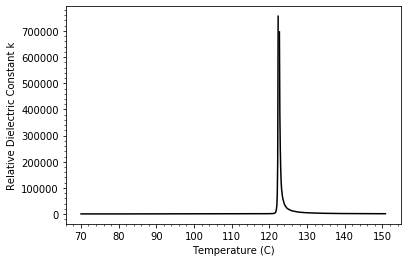

In [10]:
Floor = 2.0*10**(-10)*FACTOR
MaxT = 125+273
TC = TC2
TCError = TC2Error
yAtTC = y2[TC2index]
#######
#CNot = 10**(7)
#CNotError = 100
length = 0.01
width = 0.008
dist = 0.003
mesError = 0.001
#######
eNot = 8.85*10**(-12)
offset = 0.06
CError = CError2

#Say error in TC is the same as error in T everywhere so error in the difference (T-TC) is
TTCError = np.sqrt(2) * TCError

CNot = eNot * length * width / dist
CNotError = eNot * mesError * np.sqrt( (width / dist)**2 + (length / dist)**2 + (length * width / dist**2)**2 )

x = np.flip(x2)
y = np.flip(y2)

#x = x[(np.where(y > Floor )[0])]
#y = y[(np.where(y > Floor )[0])]

#x = x[(np.where(x < MaxT )[0])]
#y = y[(np.where(x < MaxT )[0])]

#print(np.where(y == max(y))[0])
#TCindex = (np.where(y == max(y))[0])

xLow = x[(np.where(x < TC - offset )[0])]
yLow = y[(np.where(x < TC - offset)[0])]
xHigh = x[(np.where(x > TC + offset)[0])]
yHigh = y[(np.where(x > TC + offset)[0])]

#TTCErrorArrayLow = TTCError * np.ones(np.size(xLow))
#TTCErrorArrayHigh = TTCError * np.ones(np.size(xHigh))

kInvLow = (CNot * (yAtTC - yLow))/(yLow * yAtTC)      #1/k
kInvHigh = (CNot * (yAtTC - yHigh))/(yHigh * yAtTC)

fig = plt.figure()
fig1 = fig.add_subplot(1,1,1)
fig1.set_xlabel("Temperature (C)")
fig1.set_ylabel("Relative Dielectric Constant k")
fig1.plot(xLow-273, 1/kInvLow, color='black')
fig1.plot(xHigh-273, 1/kInvHigh, color='black')
fig1.minorticks_on()
fig.savefig('BaTiO3Dielectric.jpg', bbox_inches='tight', dpi=150)
plt.show()
#put offset to 0

